In [33]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
#import datetime as dt
import pytz
from pprint import pprint


In [34]:
#onecall = True  # 8 days
onecall = False # 5 days

In [35]:
# Headers to mimic the browser 
headers = { 
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36' 
}

def get_location(city='paris',API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'):
    base_url = 'http://api.openweathermap.org/data/2.5/weather?appid='+API_Key+'&q='+city
    current = requests.get(url = base_url, headers = headers).json()
    lat = current['coord']['lat']
    lon = current['coord']['lon']
    return lat,lon

def human_date(d):
   #return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m/%Y %H:%M:%S')
   return datetime.fromtimestamp(d, pytz.timezone('Europe/Paris')).strftime('%d/%m %H:%M')

def get_date(timestamp):
    return human_date(timestamp).split(' ')[0]

def get_time(timestamp):
    return human_date(timestamp).split(' ')[1]

def print_day(n):
    pprint(onecall_data['daily'][n])


# 8 days forecast


In [36]:
onecall = False

In [37]:
if onecall:
    API_Key = 'edffd1bf975a74d5d10e58c5ac8be2d3'
    lat, lon = get_location()
    base_url = 'https://api.openweathermap.org/data/2.5/onecall?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
    data_for = '8 days'
    # request data
    try:
        print('Requesting json data')
        onecall_data = requests.get(url = base_url, headers = headers).json()
        #print(onecall_data)
    except:
        exit()

    # make dataframe and save
    print('Creating dataframe: ', data_for)

    df = onecall_data['daily']
    l = len(df[0])

    _8days = pd.DataFrame.from_records(df)
    print('Converting timestamp to human date')
    for k in _8days.keys()[:5]:
        #print(k)
        if k=='dt':  # date for dt
            _8days[k] = _8days[k].apply(get_date)
        else:        # time for other columns
            _8days[k] = _8days[k].apply(get_time)            
    _8days
    
    _8days.keys(), len(_8days.keys())

    print('Selecting columns')
    # select multiple column ranges
    focus = np.r_[:6, 8:14, 16:l]
    focus_idx = _8days.keys()[focus]

    status2 = pd.DataFrame(_8days[focus_idx])
    demain = status2.loc[1]

    demain
    
    focus

    # zip and save
    print('Save to CSV')
    compression_opts = dict(method='zip', archive_name='demain.csv')
    demain.to_csv('demain.zip', index=False, compression=compression_opts)
    # no compression 
    demain.to_csv('demain.csv')
    #pprint(onecall_data)
    print(_8days.iloc[0])  # today

    # plot temperature
    l = []
    for i in range(0,8):
        l.append(_8days.iloc[i].temp)

    df = pd.DataFrame(l)
    df.plot()
    plt.title('8 days forecast')
    plt.ylabel('Temp °C')
    plt.xlabel('Days')
    plt.grid()
    plt.show()

   
# 5 days forecast


In [38]:

API_Key = '56040ff66d50184c81a4df3a770657e3'
#API_Key = '42a2df3beefb73f7161413a3f5a53f2a'
lat, lon = get_location(API_Key=API_Key)
base_url = 'https://api.openweathermap.org/data/2.5/forecast?lat='+str(lat)+'&lon='+str(lon)+'&units=metric&exclude=hourly,minutely&appid='+API_Key
data_for = '5 days'
try:
    print('Requesting json data')
    forecast = requests.get(url = base_url, headers = headers).json()
    print(forecast)
except:
    exit()


Requesting json data
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1731402000, 'main': {'temp': 9.58, 'feels_like': 6.63, 'temp_min': 9.58, 'temp_max': 10.16, 'pressure': 1027, 'sea_level': 1027, 'grnd_level': 1017, 'humidity': 91, 'temp_kf': -0.58}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 100}, 'wind': {'speed': 6.24, 'deg': 25, 'gust': 12.15}, 'visibility': 10000, 'pop': 1, 'rain': {'3h': 0.86}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-11-12 09:00:00'}, {'dt': 1731412800, 'main': {'temp': 9.96, 'feels_like': 7.36, 'temp_min': 9.96, 'temp_max': 10.73, 'pressure': 1027, 'sea_level': 1027, 'grnd_level': 1017, 'humidity': 84, 'temp_kf': -0.77}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 100}, 'wind': {'speed': 5.5, 'deg': 44, 'gust': 9.58}, 'visibility': 10000, 'pop': 1, 'rain': {'3h': 0.26}, 'sys': {'pod': 'd'}, 'dt_txt': '2024-11-12 12:00:00'}, {'dt': 17314

In [39]:
# make dataframe and save
print('Creating dataframe: ', data_for)

df = forecast['list']
_5days = pd.DataFrame.from_records(df)
print(_5days.iloc[0])


Creating dataframe:  5 days
dt                                                   1731402000
main          {'temp': 9.58, 'feels_like': 6.63, 'temp_min':...
weather       [{'id': 500, 'main': 'Rain', 'description': 'l...
clouds                                             {'all': 100}
wind                  {'speed': 6.24, 'deg': 25, 'gust': 12.15}
visibility                                                10000
pop                                                         1.0
rain                                               {'3h': 0.86}
sys                                                {'pod': 'd'}
dt_txt                                      2024-11-12 09:00:00
Name: 0, dtype: object


In [40]:
_5days.keys()


Index(['dt', 'main', 'weather', 'clouds', 'wind', 'visibility', 'pop', 'rain',
       'sys', 'dt_txt'],
      dtype='object')

In [41]:
_5days['date'] = _5days['dt'].apply(get_date)
_5days['human_date'] = _5days['dt'].apply(human_date)
_5days['time'] = _5days['dt'].apply(get_time)
main = pd.DataFrame.from_records(_5days['main'])
_5days = pd.concat([_5days,main],axis=1)

print(_5days[['human_date', 'time', 'temp_max','temp_min']])


     human_date   time  temp_max  temp_min
0   12/11 10:00  10:00     10.16      9.58
1   12/11 13:00  13:00     10.73      9.96
2   12/11 16:00  16:00     10.52     10.21
3   12/11 19:00  19:00     10.14     10.14
4   12/11 22:00  22:00      8.84      8.84
5   13/11 01:00  01:00      9.12      9.12
6   13/11 04:00  04:00      7.46      7.46
7   13/11 07:00  07:00      6.74      6.74
8   13/11 10:00  10:00      7.28      7.28
9   13/11 13:00  13:00      9.65      9.65
10  13/11 16:00  16:00     10.36     10.36
11  13/11 19:00  19:00      9.18      9.18
12  13/11 22:00  22:00      8.31      8.31
13  14/11 01:00  01:00      7.72      7.72
14  14/11 04:00  04:00      7.47      7.47
15  14/11 07:00  07:00      8.43      8.43
16  14/11 10:00  10:00      9.99      9.99
17  14/11 13:00  13:00     12.61     12.61
18  14/11 16:00  16:00     13.33     13.33
19  14/11 19:00  19:00     11.69     11.69
20  14/11 22:00  22:00      9.37      9.37
21  15/11 01:00  01:00      8.04      8.04
22  15/11 0

In [42]:
_5days['human_date']

0     12/11 10:00
1     12/11 13:00
2     12/11 16:00
3     12/11 19:00
4     12/11 22:00
5     13/11 01:00
6     13/11 04:00
7     13/11 07:00
8     13/11 10:00
9     13/11 13:00
10    13/11 16:00
11    13/11 19:00
12    13/11 22:00
13    14/11 01:00
14    14/11 04:00
15    14/11 07:00
16    14/11 10:00
17    14/11 13:00
18    14/11 16:00
19    14/11 19:00
20    14/11 22:00
21    15/11 01:00
22    15/11 04:00
23    15/11 07:00
24    15/11 10:00
25    15/11 13:00
26    15/11 16:00
27    15/11 19:00
28    15/11 22:00
29    16/11 01:00
30    16/11 04:00
31    16/11 07:00
32    16/11 10:00
33    16/11 13:00
34    16/11 16:00
35    16/11 19:00
36    16/11 22:00
37    17/11 01:00
38    17/11 04:00
39    17/11 07:00
Name: human_date, dtype: object

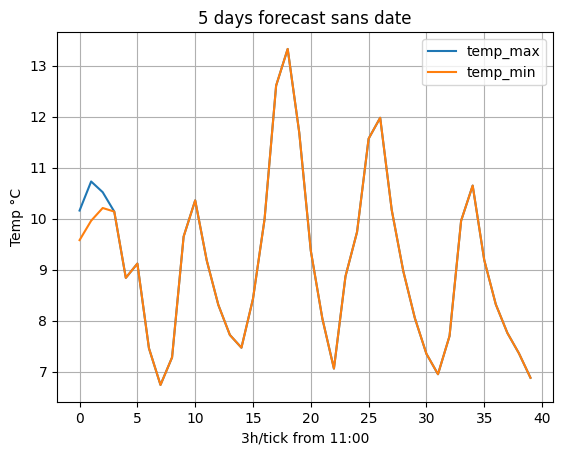

In [43]:
# plot
_5days[['temp_max','temp_min']].plot()
plt.title('5 days forecast sans date')
plt.ylabel('Temp °C')
plt.xlabel('3h/tick from 11:00')
plt.grid()
plt.show()
    

In [44]:
# pip install seaborn
import seaborn as sns

[Text(0.5, 0, 'day&hour'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

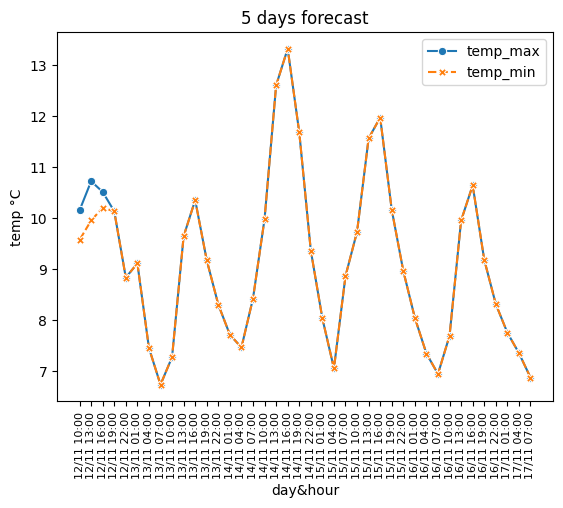

In [45]:
# plot 5 days temp for every 3 hours tick
df1 = pd.DataFrame(_5days[['human_date','temp_max','temp_min']]) 
df1 = df1.set_index('human_date')
df1
ax= sns.lineplot(data=df1, markers= True)
plt.xticks(rotation=90, fontsize=8)
#plt.grid()
ax.set(xlabel='day&hour', ylabel='temp °C', title='5 days forecast') 

[Text(0.5, 0, 'time (hours)'),
 Text(0, 0.5, 'temp °C'),
 Text(0.5, 1.0, '5 days forecast')]

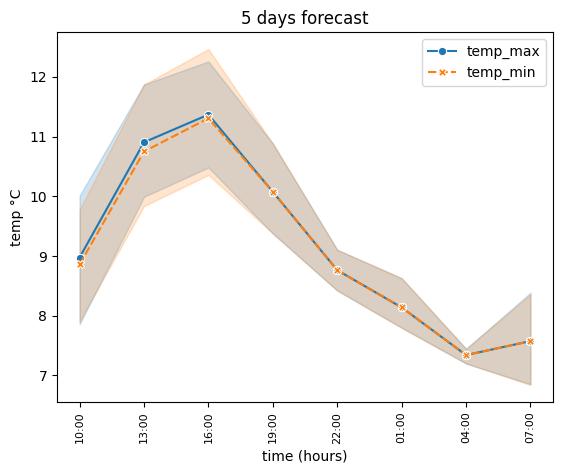

In [46]:
# index on hours get 5 days hour window variation
df2 = pd.DataFrame(_5days[['time','temp_max','temp_min']]) 
df2
df2 = df2.set_index('time')
df2
ax= sns.lineplot(data=df2, markers= True)
plt.xticks(rotation=90, fontsize=8)
ax.set(xlabel='time (hours)', ylabel='temp °C', title='5 days forecast') 